In [1]:
from Environments.RandomWalk import make_random_walk, estimate_goal_probability
from Environments.FrozenLake import make_frozen_lake

from Sarsa.ExpectedSarsa import ExpectedSarsaCV

from TD.TDZero import TDZeroCV


pygame 2.6.1 (SDL 2.28.4, Python 3.13.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Environments Estimated MC Success Rate

In [2]:
frozen_lake = make_frozen_lake()
random_walk = make_random_walk()

In [3]:
print("Random Walk")
estimate_goal_probability(random_walk)

print("Frozen Lake")
estimate_goal_probability(frozen_lake)

Random Walk
Estimated probability of reaching the goal: 0.1938
Frozen Lake
Estimated probability of reaching the goal: 0.0137


### TD(0) + Random Walk

Number of permutations: 1
Alpha values: [0.003]
Gamma values: [0.7]


Alpha: 0.0030, Gamma: 0.7000, Avg Success: 27.40%, Avg Rewards: 0.25
Top 5 Results:
Run 1: {'alpha': 0.003, 'gamma': 0.7}, Avg Success: 27.40%, Avg Rewards: 0.25


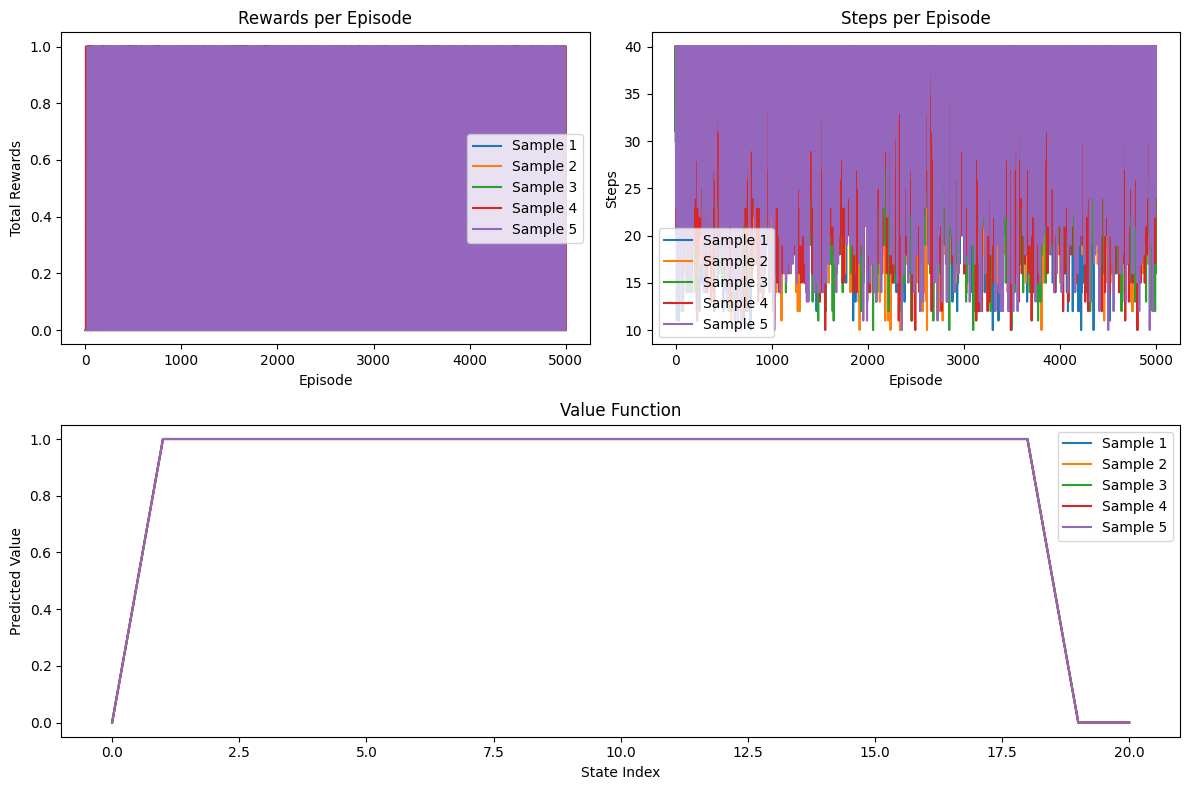

In [4]:
# Best results: alpha=0.003, gamma=0.7
cv = TDZeroCV(random_walk, {"alpha": [0.003], "gamma": [0.7]})
cv.search(episodes=5000)
cv.summary()
cv.plot_metrics()

### TD(0) + Frozen Lake

Number of permutations: 1
Alpha values: [0.003]
Gamma values: [0.2]
Alpha: 0.0030, Gamma: 0.2000, Avg Success: 100.00%, Avg Rewards: 1.00
Top 5 Results:
Run 1: {'alpha': 0.003, 'gamma': 0.2}, Avg Success: 100.00%, Avg Rewards: 1.00


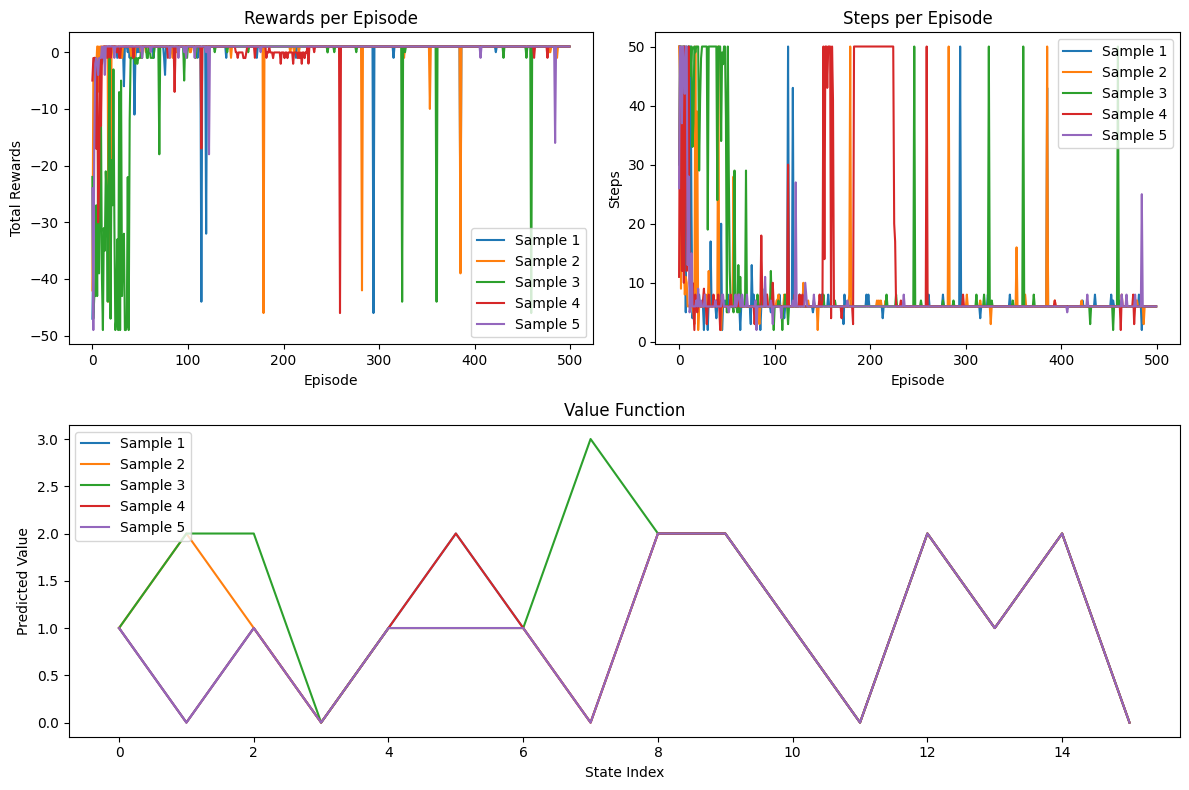

In [5]:
# Best alpha=0.003, gamma=0.2
cv = TDZeroCV(frozen_lake, {"alpha": [0.003], "gamma": [0.2]})
cv.search(episodes=500)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Random Walk

Testing params: alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95, Success rate: 27.40%
Top 5 results:
alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95, success_rate=27.40%


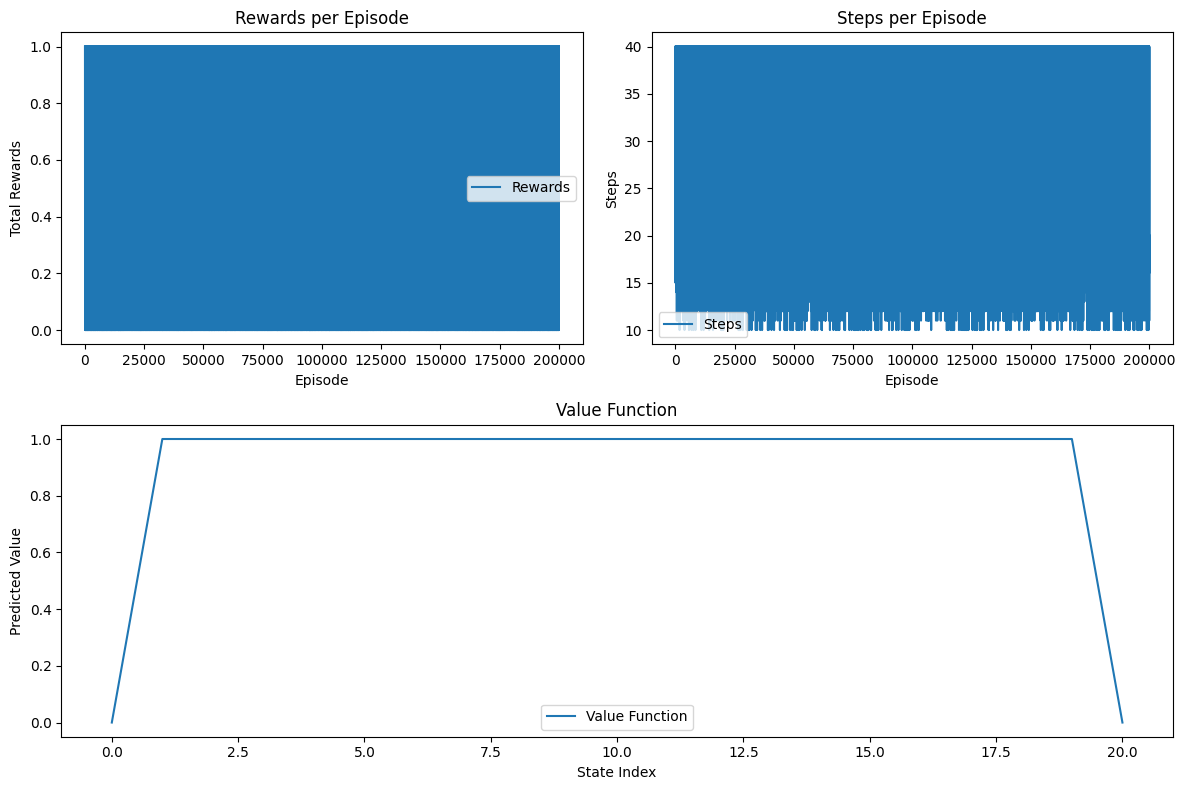

In [6]:
# Best alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95
random_walk = make_random_walk()
cv = ExpectedSarsaCV(random_walk, { "alpha": [0.01], "epsilon": [2.0], "decay_rate": [0.99], "gamma": [0.95] })
cv.search(episodes=200000)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Frozen Lake

Testing params: alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, Success rate: 100.00%
Top 5 results:
alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, success_rate=100.00%


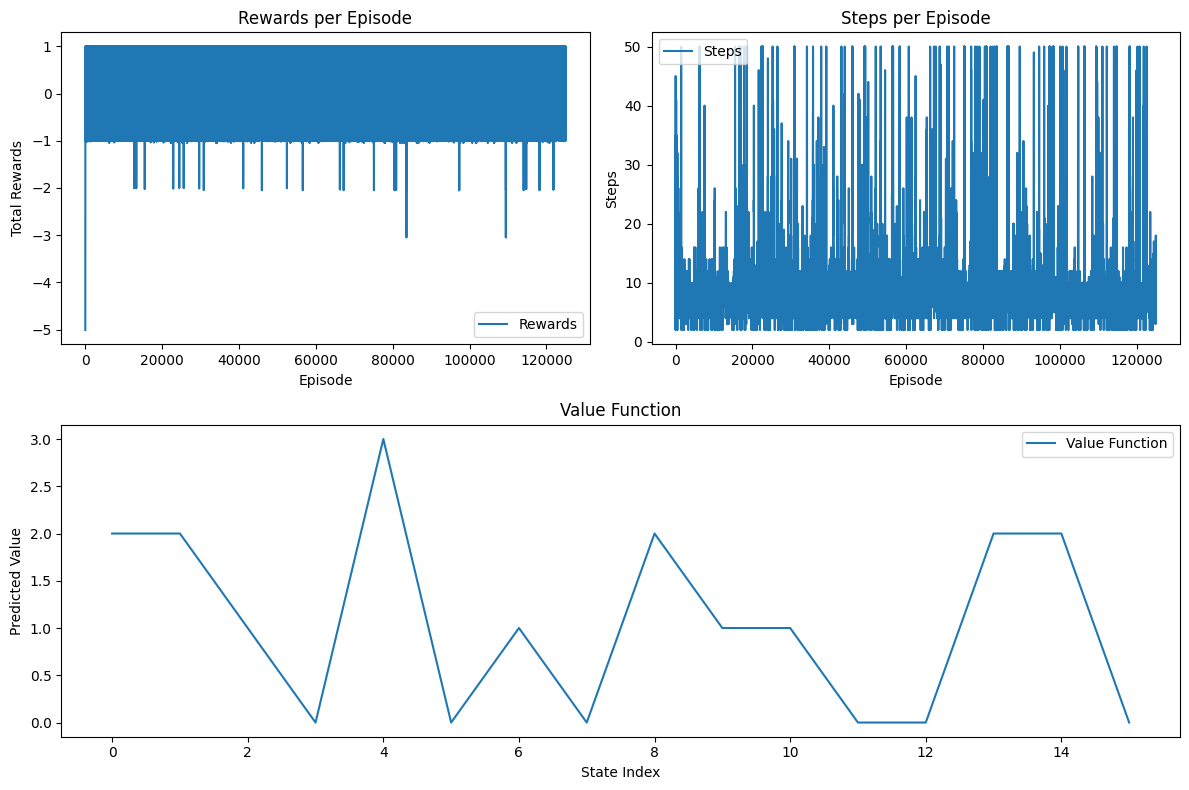

In [18]:
# Best alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01
cv = ExpectedSarsaCV(frozen_lake, { "alpha": [0.01], "epsilon": [0.5], "decay_rate": [0.5], "gamma": [0.01] })
cv.search(episodes=125000)
cv.summary()
cv.plot_metrics()